# 绘图函数

本章介绍通用的统计绘图函数，比如直方图、箱型图等。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 水平或竖直的线/矩形：ax.axhline / axhspan

用 `axhline/axvline` 绘制水平线/竖直线，用 `axhspan/axvspan` 绘制水平矩形/竖直矩形。

需要注意，下例中 `axhspan` 中的 `xmin` 参数是一个相对比例。

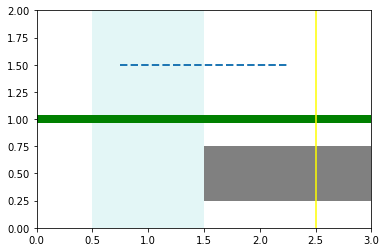

In [6]:
f, ax = plt.subplots()

ax.axis([0, 3, 0, 2])
ax.axhline(1, lw=8, color='g')
ax.axhline(y=1.5, ls="--", lw=2, xmin=0.25, xmax=0.75)
ax.axvline(2.5, color="yellow")

ax.axhspan(0.25, 0.75, xmin=0.5, facecolor='0.5')
ax.axvspan(0.5, 1.5, facecolor="#74D2D5", alpha=0.2)

plt.show()

## 散点图：ax.scatter

如果不显示点的大小，最简单的散点图可以用 `plot(..., '.')` 绘制：

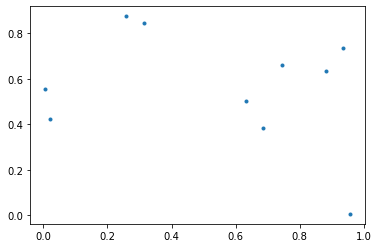

In [8]:
np.random.seed(230)
x, y = np.random.rand(2, 10)

f, ax = plt.subplots()
ax.plot(x, y, '.')

plt.show()

言归正传，正常的散点图用 `scatter`：

- `s`：每个点的大小，一个列表。
- `c`：每个点的颜色，一个列表。

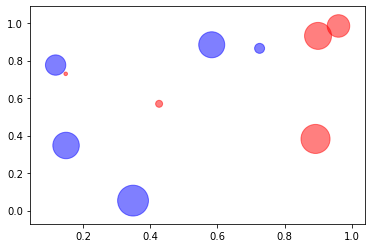

In [12]:
np.random.seed(233)
x, y = np.random.rand(2, 10)
np.random.seed(666)
point_size = 1000 * np.random.rand(10)

f, ax = plt.subplots()
ax.scatter(x, y, s=point_size, c=["b", "r"] * 5, alpha=0.5)
plt.show()

## 条形图：ax.bar / barh

条形图用 `bar` 绘制竖立的，或者用 `barh` 绘制横置的。

第四幅子图用到了 `matplotlib.ticker.PercentFormatter` 来将纵轴的刻度改为百分数，读者可以参考之前的坐标轴刻度章节，或者[官方 Tick formatters 示例](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html)。

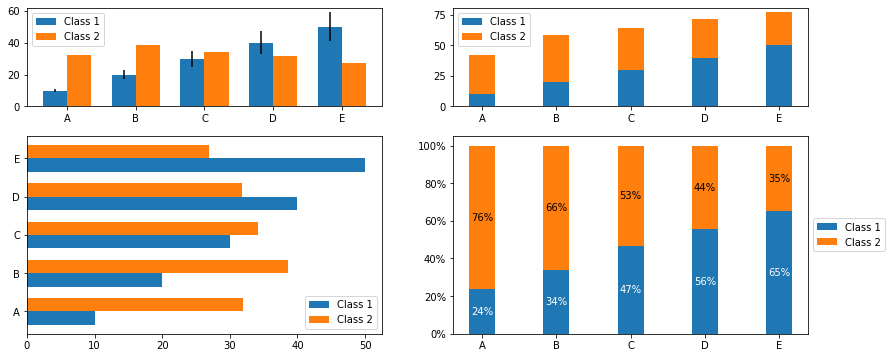

In [19]:
import matplotlib.ticker as ticker

bar_width = 0.35
groups = np.arange(5)
y1 = np.linspace(10, 50, 5)
np.random.seed(0)
y2 = np.random.rand(5) * 40 + 10 

f, ax = plt.subplots(2, 2, figsize=(14, 6), gridspec_kw = {'height_ratios':[1, 2]})
# 并列竖立条形图
ax[0,0].bar(groups, y1, bar_width, label="Class 1",
          yerr=2 * groups + 1)
ax[0,0].bar(groups + bar_width, y2, bar_width, label="Class 2")
ax[0,0].set_xticks(groups + bar_width / 2)
ax[0,0].set_xticklabels(list("ABCDE"))
ax[0,0].legend(loc="upper left")

# 堆叠竖立条形图
ax[0,1].bar(groups, y1, bar_width, label="Class 1")
ax[0,1].bar(groups, y2, bar_width, bottom=y1, label="Class 2")
ax[0,1].set_xticks(groups)
ax[0,1].set_xticklabels(list("ABCDE"))
ax[0,1].legend(loc="upper left")

# 横置条形图
ax[1,0].barh(groups, y1, bar_width, label="Class 1")
ax[1,0].barh(groups + bar_width, y2, bar_width, label="Class 2")
ax[1,0].set_yticks(groups + bar_width / 2)
ax[1,0].set_yticklabels(list("ABCDE"))
ax[1,0].legend(loc="lower right")

# 堆叠竖立百分比条形图（附百分比数字）
y1_percent = y1 / (y1 + y2)
y2_percent = y2 / (y1 + y2)
ax[1,1].bar(groups, y1_percent, bar_width, label="Class 1")
ax[1,1].bar(groups, y2_percent, bar_width, bottom=y1_percent, label="Class 2")
## 加上百分比字串
for k in range(len(groups)):
    ax[1,1].text(groups[k], y1_percent[k]/2, r"{:.0%}".format(y1_percent[k]),
                 color="w", ha="center", va="center")
    ax[1,1].text(groups[k], y2_percent[k]/2 + y1_percent[k], 
                 r"{:.0%}".format(y2_percent[k]), color="k", ha="center", va="center")
ax[1,1].set_xticks(groups)
ax[1,1].set_xticklabels(list("ABCDE"))
ax[1,1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
## 设置 y 轴刻度
ax[1,1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

plt.show()